<a href="https://colab.research.google.com/github/LaughBuddha/Predictive-Analytics/blob/master/US_Traffic_Accidents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **US-Accidents: A Countrywide Traffic Accident Dataset**

# **Traffic Deaths in U.S. Exceed 40,000 for Third Straight Year**

A 2019 Bloomberg article reported that deaths due to road accidents in US are on a rise for the third straight year and crossed 40,000 mark again in 2019 after 2018 and 2017.

As per another source, there were 264 million registered vehicles in the US and 218 million drivers holding a driving license in 2018.

With the increasing number of vehicles on the road, there is a need to analyze the cause of these accidents and take measures at the earliest to prevent the growth trend of these accidents.


https://www.bloomberg.com/news/articles/2019-02-13/traffic-deaths-in-u-s-exceed-40-000-for-third-straight-year


The **US traffic accident** dataset records the details of 3 million road accidents occuring between Feb 2016 - Dec 2019. The datasets contains information on various fronts such as geography, weather conditions, road conditions, time of accident etc. We intend to extract crucial information and patterns from this data using various analytical methods and modelling techniques in this work.


US-Accidents can be used for numerous applications such as real-time accident prediction, studying accident hotspot locations, casualty analysis and extracting cause and effect rules to predict accidents, or studying the impact of precipitation or other environmental stimuli on accident occurrence.


Source:
https://smoosavi.org/datasets/us_accidents

https://en.wikipedia.org/wiki/Motor_vehicle_fatality_rate_in_U.S._by_year

![crash](https://66.media.tumblr.com/bd958c7ac7af80291bcb3aefb9f2d00f/tumblr_ovqlr5BXiE1vbcnq8o1_500.gifv)

# **Mount google drive**

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


**Go to local folder/directory**

In [0]:
import os
os.chdir('/content/drive/My Drive/CIS545_project')

# **Data Extraction**

Download dataset and unzip

0.1 Dataset downloaded from the official link - https://smoosavi.org/datasets/us_accidents

0.2 Dataset loaded in Google drive for easy access

0.3 Unzip dataset

In [0]:
!tar -xvf '/content/drive/My Drive/CIS545_project/US_Accidents_Dec19.tar.gz'

US_Accidents_Dec19.csv


# **Import required files and libraries**

In [0]:
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.impute import SimpleImputer

from __future__ import (absolute_import, division, print_function)

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap as Basemap
from matplotlib.colors import rgb2hex, Normalize
from matplotlib.patches import Polygon
from matplotlib.colorbar import ColorbarBase

# **Loading file in Pandas dataframe**

In [0]:
traffic_df = pd.read_csv('/content/drive/My Drive/CIS545_project/US_Accidents_Dec19.csv')

# **Data Exploration**

# ***Dataset shape and size***

No. of Records: 2,974,335 ($\approx$ 3 million)

No. of features: 49

In [0]:
traffic_df.shape

(2974335, 49)

In [0]:
traffic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2974335 entries, 0 to 2974334
Data columns (total 49 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   TMC                    float64
 3   Severity               int64  
 4   Start_Time             object 
 5   End_Time               object 
 6   Start_Lat              float64
 7   Start_Lng              float64
 8   End_Lat                float64
 9   End_Lng                float64
 10  Distance(mi)           float64
 11  Description            object 
 12  Number                 float64
 13  Street                 object 
 14  Side                   object 
 15  City                   object 
 16  County                 object 
 17  State                  object 
 18  Zipcode                object 
 19  Country                object 
 20  Timezone               object 
 21  Airport_Code           object 
 22  Weather_Timestamp 

# **Feature Analysis**
The features can be grouped into following categories.


> Accident Info.| Geographical location | Weather | Road signs | Day/Night
>--- | --- | --- | --- | --- 
> ID | Start_Lat | Temperature(F) | Amenity            | Sunrise_Sunset
> Source | Start_Lng | Wind_Chill(F)  | Bump               | Civil_Twilight
> TMC| End_Lat   | Humidity(%)    | Crossing           | Nautical_Twilight
> Severity| End_Lng   | Pressure(in)   | Give_Way           | Astronomical_Twilight
> Start_Time | Number    | Visibility(mi) | Junction           |
> End_Time | Street    | Wind_Direction | No_Exit            |
> Description | Side      | Wind_Speed(mph)| Railway            |
> Distance(mi)| City      | Precipitation(in) | Roundabout      |
>| County    | Weather_Condition | Station	       |
>| State     |                   | Stop            |
>| Zipcode   |                   | Traffic_Calming |
>| Country   |                   | Traffic_Signal  |
>|           |                   | Turning_Loop    |


Going forward we analyse these features in the following order.
We start by finding the top states with majority of the accidents. From there on, we focus our discussion on finding the reasons for the high rate of accidents in these states as compared to the rest. Further, we analyze the features as per the categories/groups listed above with respect to the states.

# **Removing unwanted/redundant columns**

Following columns were removed as they did not add any critical information

1. Country - Only value US
2. Truning_Loop - Only value 'False'
3. ID - Accident ID
4. Source - Source of accident information - MapQuest, Bing, MapQuest_Bing

In [0]:
drop_col = ['ID', 'Source', 'Country', 'Turning_Loop']
traffic_df.drop(drop_col, axis='columns', inplace=True)

# **Exploratory Data Analysis**

## **Location of accidents - State wise analysis**

**Which states have the most number of accidents?**

The dataset contains accident data of 49 US states

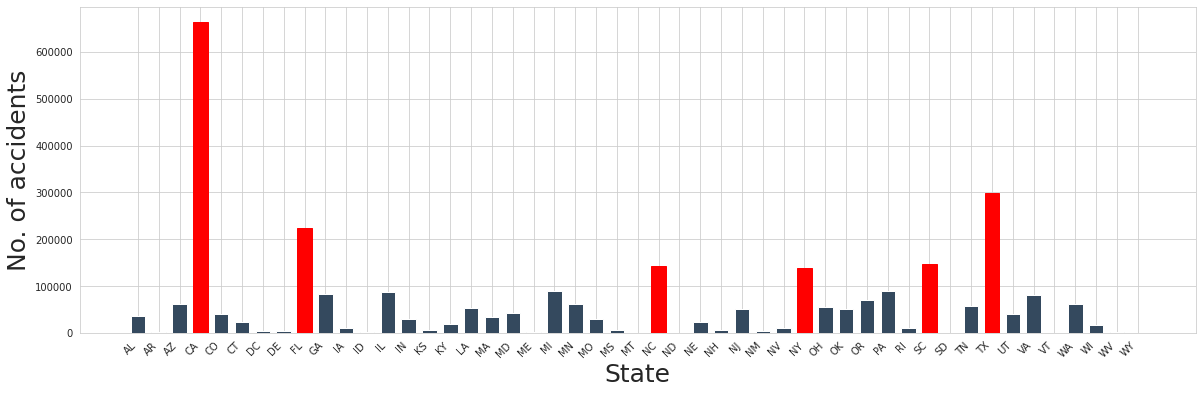

In [0]:
d_state = dict(traffic_df['State'].astype('category').value_counts(sort=False))

plt.figure(figsize=(20,6))
bar_state = plt.bar(x = d_state.keys(), height = d_state.values(), color = '#34495e', align='center', width=0.7)
for i in [3,8,25,32,38,41]:
  bar_state[i].set_color('r')
plt.xlabel("State", fontsize=25)
plt.ylabel("No. of accidents", fontsize=25)
plt.xticks(rotation=45, ha="right");
plt.grid(True)

Top six states with highest number of accidents

> State | No. of accidents
> --- | ---
> CA | 663,204
> TX | 298,062
> FL | 223,746
> SC | 146,689
> NC | 142,460
> NY | 137,799
> **Total** | 1,611,960

$ \frac{Accidents\ in\ top\ 6\ states}{Total\ no.\ of\ accidents} = \frac{1611960}{2974335} = 0.54$

Together, these states account for more than half of accidents in US


Let's visualize the density of accidents in different states on the country map. The states with high frequency of accidents are darker in color as compared to states with lower frequency of accidents.

In [0]:
#@title State names to codes dictionary
name_2_code = {
        'Alaska': 'AK', 
        'Alabama': 'AL', 
        'Arkansas': 'AR', 
        'American Samoa': 'AS', 
        'Arizona': 'AZ', 
        'California': 'CA', 
        'Colorado': 'CO', 
        'Connecticut': 'CT', 
        'District of Columbia': 'DC', 
        'Delaware': 'DE', 
        'Florida': 'FL', 
        'Georgia': 'GA', 
        'Guam': 'GU', 
        'Hawaii': 'HI', 
        'Iowa': 'IA', 
        'Idaho': 'ID', 
        'Illinois': 'IL', 
        'Indiana': 'IN', 
        'Kansas': 'KS',
        'Kentucky': 'KY',
        'Louisiana': 'LA',
        'Massachusetts': 'MA',
        'Maryland': 'MD',
        'Maine': 'ME',
        'Michigan': 'MI',
        'Minnesota': 'MN',
        'Missouri': 'MO',
        'Northern Mariana Islands': 'MP',
        'Mississippi': 'MS',
        'Montana': 'MT',
        'National': 'NA',
        'North Carolina': 'NC',
        'North Dakota': 'ND',
        'Nebraska': 'NE',
        'New Hampshire': 'NH',
        'New Jersey': 'NJ',
        'New Mexico': 'NM',
        'Nevada': 'NV',
        'New York': 'NY',
        'Ohio': 'OH',
        'Oklahoma': 'OK',
        'Oregon': 'OR',
        'Pennsylvania': 'PA',
        'Puerto Rico': 'PR',
        'Rhode Island': 'RI',
        'South Carolina': 'SC',
        'South Dakota': 'SD',
        'Tennessee': 'TN',
        'Texas': 'TX',
        'Utah': 'UT',
        'Virginia': 'VA',
        'Virgin Islands': 'VI',
        'Vermont': 'VT',
        'Washington': 'WA',
        'Wisconsin': 'WI',
        'West Virginia': 'WV',
        'Wyoming': 'WY'
}

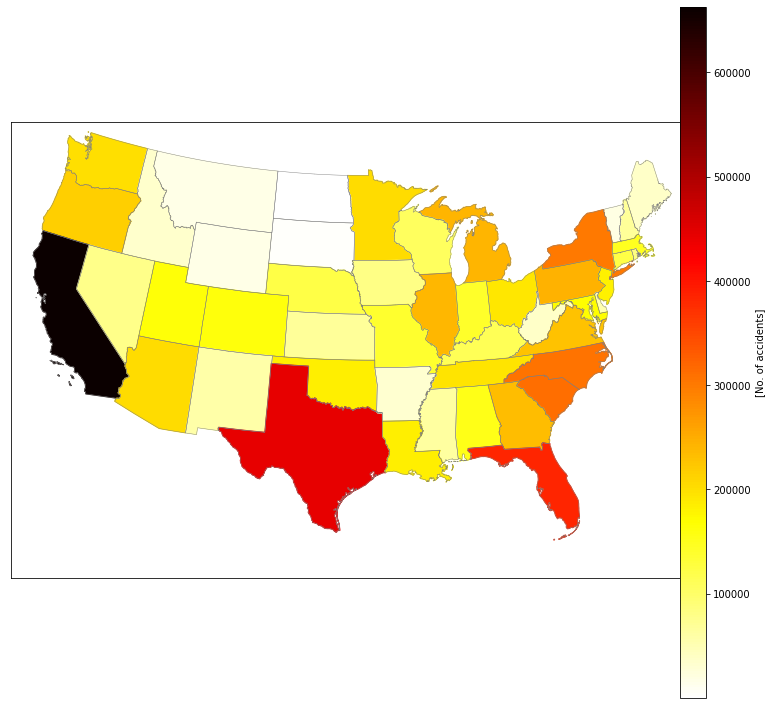

In [0]:
#@title Display accident proportions by states
fig, ax = plt.subplots(figsize=(12,12))

# Lambert Conformal map of lower 48 states.
m = Basemap(llcrnrlon=-119,llcrnrlat=20,urcrnrlon=-64,urcrnrlat=49,
            projection='lcc',lat_1=33,lat_2=45,lon_0=-95)

# Mercator projection, for Alaska and Hawaii
m_ = Basemap(llcrnrlon=-190,llcrnrlat=20,urcrnrlon=-143,urcrnrlat=46,
            projection='merc',lat_ts=20)  # do not change these numbers

#%% ---------   draw state boundaries  ----------------------------------------
## data from U.S Census Bureau
## http://www.census.gov/geo/www/cob/st2000.html
shp_info = m.readshapefile('st99_d00','states',drawbounds=True,
                           linewidth=0.45,color='gray')
shp_info_ = m_.readshapefile('st99_d00','states',drawbounds=False)

#%% -------- choose a color for each state based on population density. -------
colors={}
statenames=[]
cmap = plt.cm.hot_r # use 'reversed hot' colormap
vmin = min(d_state.values()); vmax = max(d_state.values()) # set range.
norm = Normalize(vmin=vmin, vmax=vmax)
for shapedict in m.states_info:
    statename = shapedict['NAME']
    # skip DC and Puerto Rico.
    if statename not in ['District of Columbia','Puerto Rico', 'Alaska', 'Hawaii' ]:
        # pop = popdensity[statename]

        pop = d_state[name_2_code[statename]]

        # calling colormap with value between 0 and 1 returns
        # rgba value.  Invert color range (hot colors are high
        # population), take sqrt root to spread out colors more.
        colors[statename] = cmap(np.sqrt((pop-vmin)/(vmax-vmin)))[:3]
    statenames.append(statename)

#%% ---------  cycle through state names, color each one.  --------------------
for nshape,seg in enumerate(m.states):
    # skip DC and Puerto Rico.
    if statenames[nshape] not in ['Puerto Rico', 'District of Columbia', 'Alaska', 'Hawaii']:
        color = rgb2hex(colors[statenames[nshape]])
        poly = Polygon(seg,facecolor=color,edgecolor=color)
        ax.add_patch(poly)

AREA_1 = 0.005  # exclude small Hawaiian islands that are smaller than AREA_1
AREA_2 = AREA_1 * 30.0  # exclude Alaskan islands that are smaller than AREA_2
AK_SCALE = 0.19  # scale down Alaska to show as a map inset
HI_OFFSET_X = -1900000  # X coordinate offset amount to move Hawaii "beneath" Texas
HI_OFFSET_Y = 250000    # similar to above: Y offset for Hawaii
AK_OFFSET_X = -250000   # X offset for Alaska (These four values are obtained
AK_OFFSET_Y = -750000   # via manual trial and error, thus changing them is not recommended.)

ax.set_title('United states traffic accidents by state', fontsize=25, color='w', weight='bold')

#%% ---------   Show color bar  ---------------------------------------
ax_c = fig.add_axes([0.9, 0.1, 0.03, 0.8])
cb = ColorbarBase(ax_c,cmap=cmap,norm=norm,orientation='vertical',
                  label=r'[No. of accidents]')

plt.show()

The above map also confirms our finding of the states with most number of accidents. CA has the highest number of accidents with the darkest color on the color map. Next, we have TX and FL in red followed by SC, NC, and NY in orange.

Now that we know that states like CA, TX, and FL have the highest number of accidents, lets try to figure out the reason behind such high number of accidents in some states while the frequency being drastically low in the rest of the 42 states.

We focus on figuring out the key reason for high number of accidents in some states and why the number of accidents in other states have a low number/rate of accidents.

# **Weather Conditions**

The following fields in the dataset describe the various aspects of weather conditions at the time of accident.

> Weather |
> --- |
> Temperature(F)     |
> Wind_Chill(F)      |
> Humidity(%)	       |
> Pressure(in)       |
> Visibility(mi)     |
> Wind_Direction     |
> Wind_Speed(mph)	   |
> Precipitation(in)	 |
> Weather_Condition	 |

We analyse the effect of these conditions on the rate of accidents in various states to extract cause and effect rules to predict accidents and the severity of the accident.


In [0]:
high_state = ['CA', 'FL', 'TX', 'NY', 'NC', 'SC']
top_6 = traffic_df[traffic_df.State.isin(high_state)]

### **Wind Speed**

We plot box plots to visualize the range of wind speed across different states. The top 6 states with most number of accidents are marked in red. 

We observe there is no special wind speed range in these states. This helps us to conclude that wind speed individually is not the reason of high numberof accidents in these states.

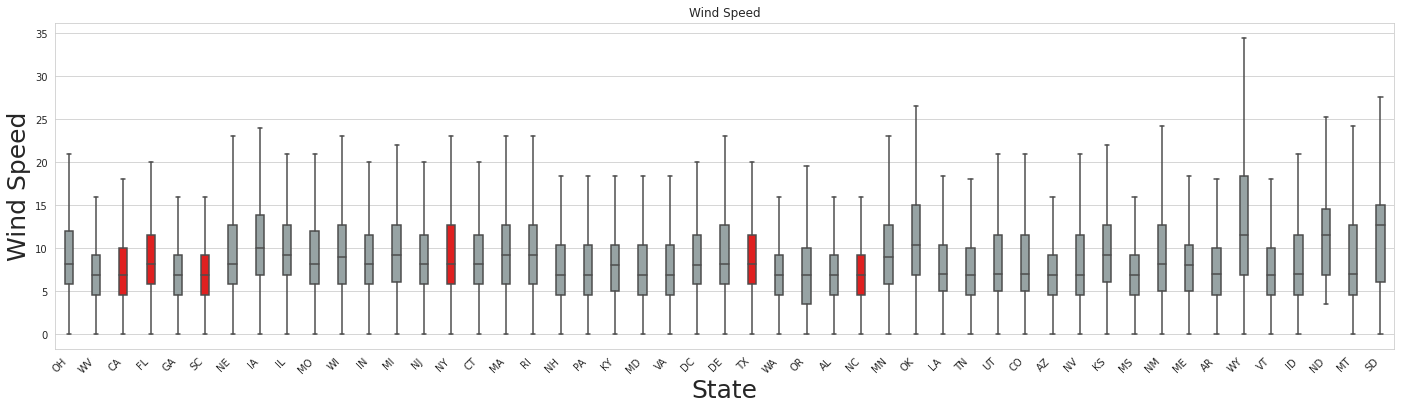

In [0]:
#@title Box plots showing the range of wind speed in different states
# plt.hist(traffic_df[traffic_df.State == 'CA']['Wind_Speed(mph)'])
plt.figure(figsize=(24,6))
sns.set_style("whitegrid")
pal = {states: "r" if states in ['CA', 'FL', 'TX', 'NC', 'SC', 'NY'] else "#95a5a6" for states in traffic_df.State.unique()}
sns.boxplot(x= 'State', y='Wind_Speed(mph)' , data=traffic_df, width=.3, palette=pal, fliersize=1, showfliers=False)
plt.xlabel("State", fontsize=25)
plt.ylabel("Wind Speed", fontsize=25)
plt.title('Wind Speed');
plt.xticks(rotation=45,  ha="right");

### **Precipitation**

From the below graph, it is observed that most of the accidents in NY happen on days with high precipitation. The precipitation levels are considerably high in NY as compared to other states including the other 5 states with high accident proportion.

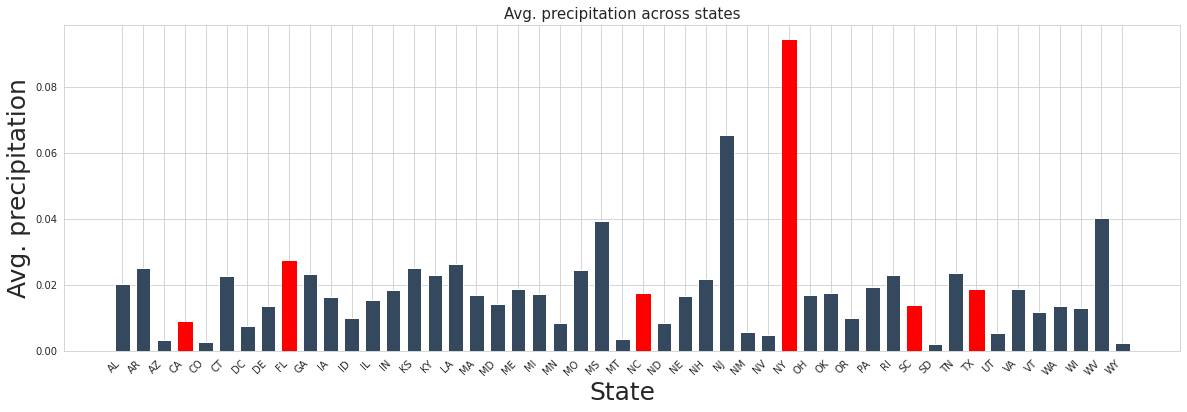

In [0]:
#@title Precipitation trend across states at the time of accidents
prec_mean = dict(traffic_df.groupby('State').mean()['Precipitation(in)'])

plt.figure(figsize=(20,6))
bar_state = plt.bar(x = prec_mean.keys(), height = prec_mean.values(), color = '#34495e', align='center', width=0.7)
for i in [3,8,25,32,38,41]:
  bar_state[i].set_color('r')
plt.xlabel("State", fontsize=25)
plt.ylabel("Avg. precipitation", fontsize=25)
plt.title("Avg. precipitation across states", fontsize=15)
plt.xticks(rotation=45, ha="right");
plt.grid(True)

### **Visibility**
The below graph indicates that there is no special or odd pattern in visibilty trends across states at the time of accidents. The visibility has been more or less same between 8 and 10 miles apart from CO where the mean visibility is around 13 miles.

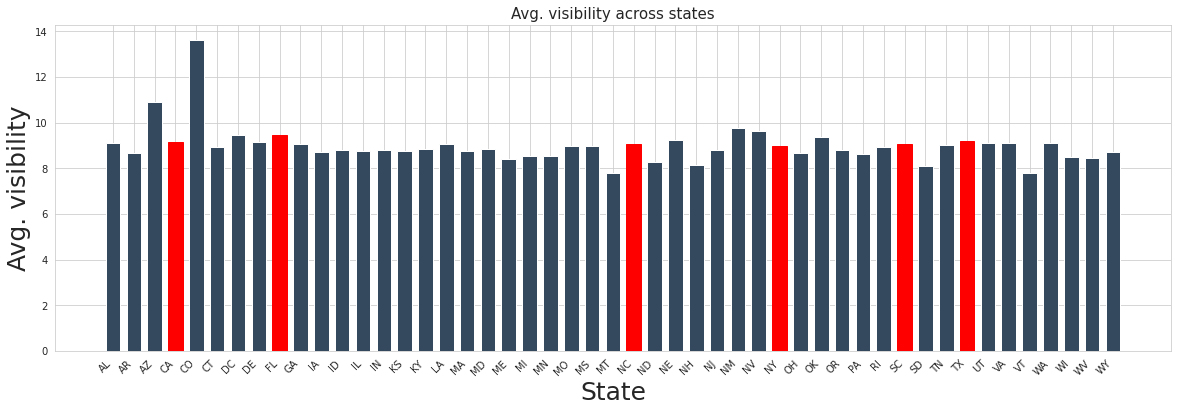

In [0]:
#@title Visibility trends across states
visibility_mean = dict(traffic_df.groupby('State').mean()['Visibility(mi)'])

plt.figure(figsize=(20,6))
bar_state = plt.bar(x = visibility_mean.keys(), height = visibility_mean.values(), color = '#34495e', align='center', width=0.7)
for i in [3,8,25,32,38,41]:
  bar_state[i].set_color('r')
plt.xlabel("State", fontsize=25)
plt.ylabel("Avg. visibility", fontsize=25)
plt.title("Avg. visibility across states", fontsize=15)
plt.xticks(rotation=45, ha="right");
plt.grid(True)

Visibility is more or less same across all the states.

---
Therefore, visibility is not the factor for the different number of accidents in states.


### **Humidity**

No special trends observed in humidity as well apart from the fact that these trends indicate general humidity levels in these states

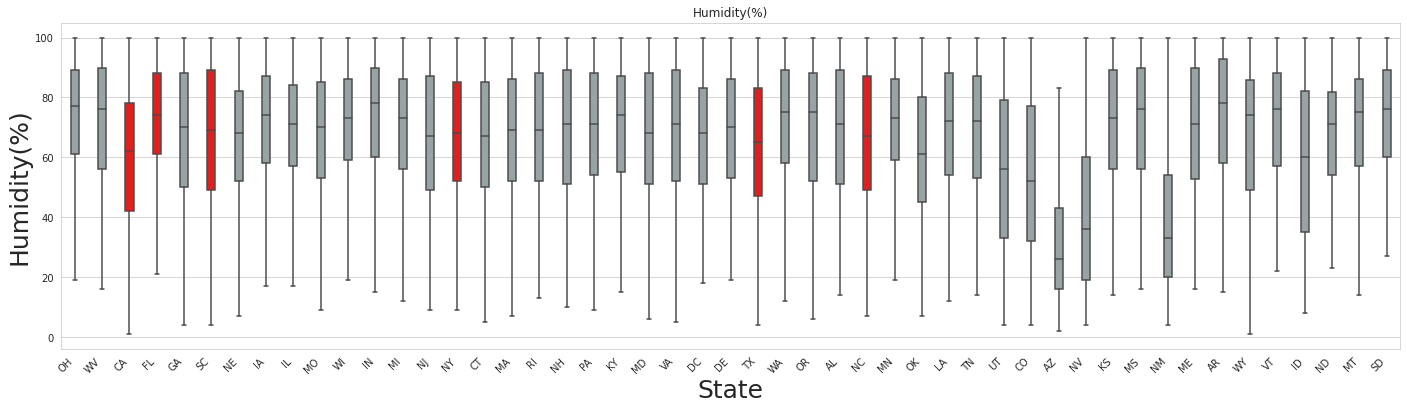

In [0]:
#@title Box plots with humidity trends across states
# plt.hist(traffic_df[traffic_df.State == 'CA']['Wind_Speed(mph)'])
plt.figure(figsize=(24,6))
sns.set_style("whitegrid")
pal = {states: "r" if states in ['CA', 'FL', 'TX', 'NC', 'SC', 'NY'] else "#95a5a6" for states in traffic_df.State.unique()}
sns.boxplot(x= 'State', y='Humidity(%)' , data=traffic_df, width=.3, palette=pal, fliersize=1, showfliers=False)
plt.xlabel("State", fontsize=25)
plt.ylabel("Humidity(%)", fontsize=25)
plt.title('Humidity(%)');
plt.xticks(rotation=45,  ha="right");

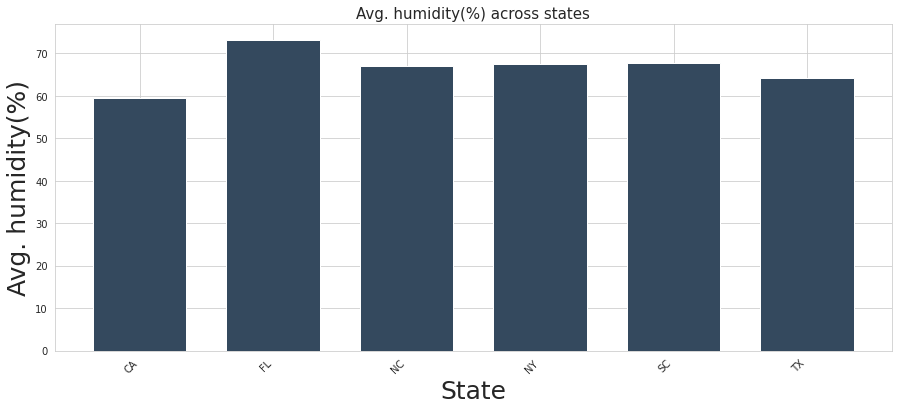

In [0]:
#@title Humidity across the six states with highest number of accidents
humidity_mean = dict(top_6.groupby('State').mean()['Humidity(%)'])
plt.figure(figsize=(15,6))
bar_state = plt.bar(x = humidity_mean.keys(), height = humidity_mean.values(), color = '#34495e', align='center', width=0.7)
# for i in [3,8,25,32,38,41]:
#   bar_state[i].set_color('r')
plt.xlabel("State", fontsize=25)
plt.ylabel("Avg. humidity(%)", fontsize=25)
plt.title("Avg. humidity(%) across states", fontsize=15)
plt.xticks(rotation=45, ha="right");
plt.grid(True)

### **Weather conditions**

In the dataset, we have a column describing the weather at the time of accident. By intuition, we hypothesize that this feature should play a crucial role in impacting the occurance of accident. 

It becomes difficult to drive in harsh weather and is considered unsafe. Therefore, we expect the number of accidents to be higher during weather conditions like rain, snow, thunderstorm, hail, fog etc.

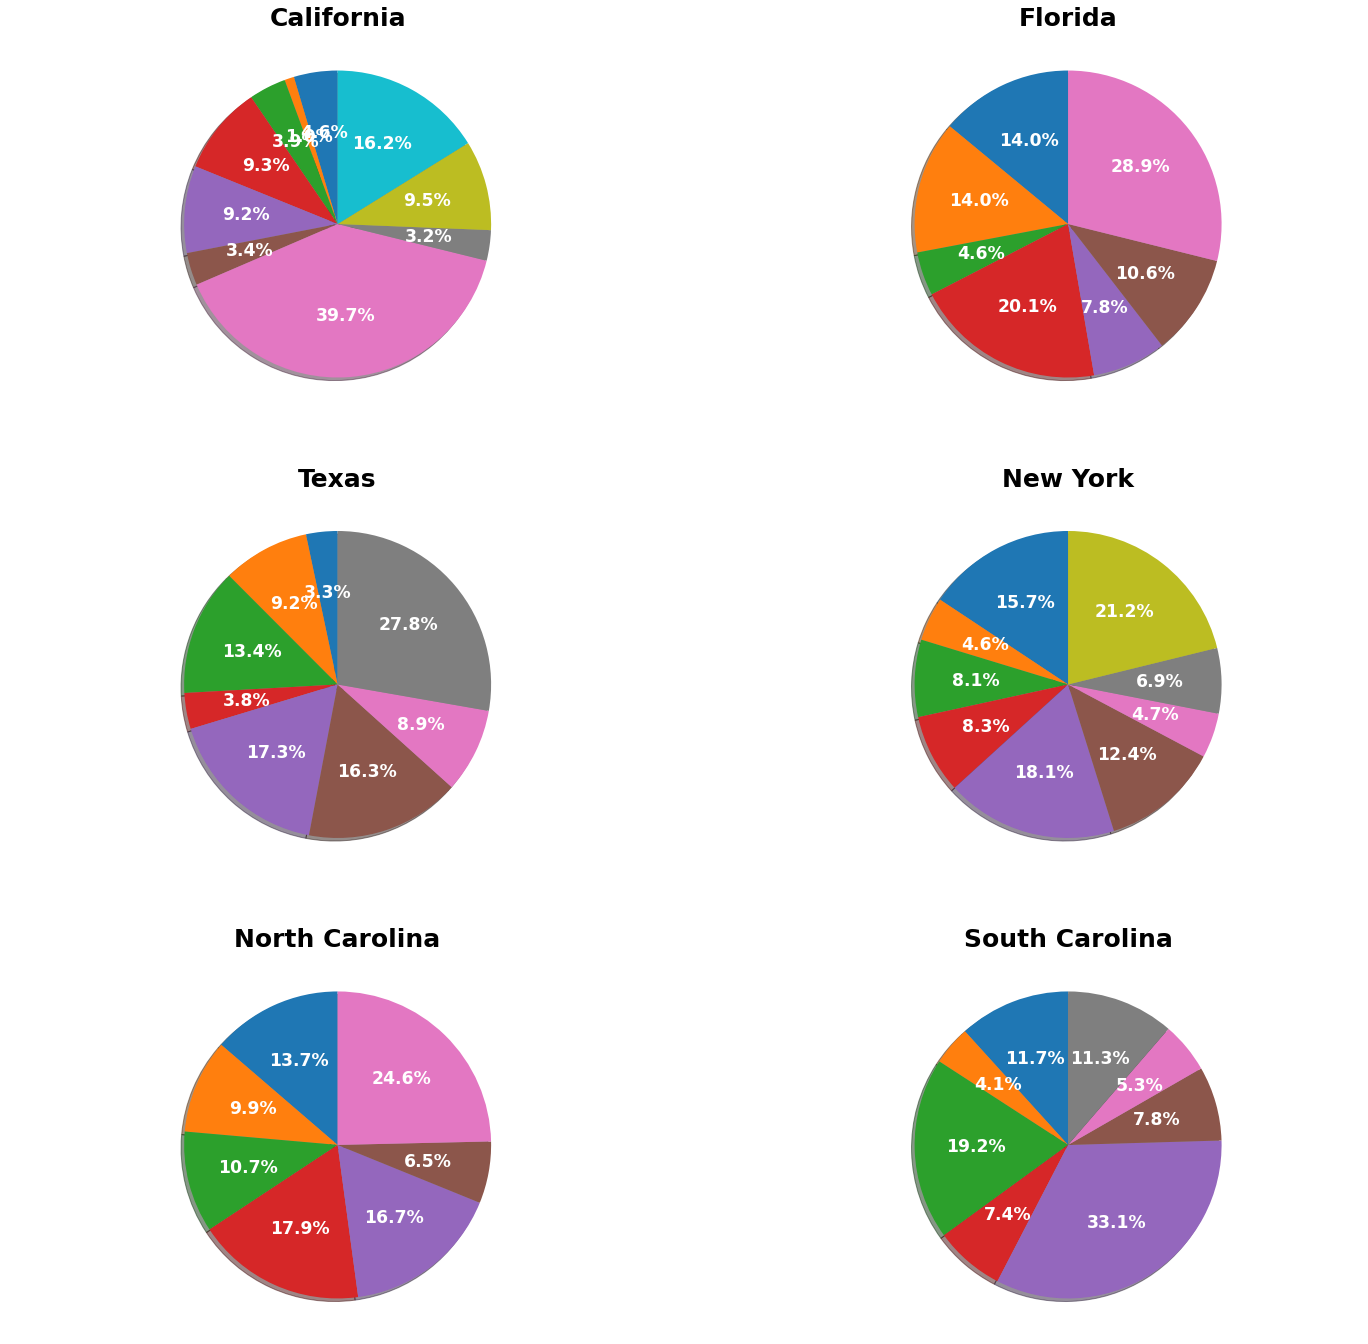

In [0]:
#@title Accident proportion on the basis of weather condition in each state
ca_cond = dict(traffic_df[traffic_df['State']=='CA']['Weather_Condition'].value_counts(sort=False))
ca_cond = {key:val for key, val in ca_cond.items() if val > 5000}
fl_cond = dict(traffic_df[traffic_df['State']=='FL']['Weather_Condition'].value_counts(sort=False))
fl_cond = {key:val for key, val in fl_cond.items() if val > 5000}
tx_cond = dict(traffic_df[traffic_df['State']=='TX']['Weather_Condition'].value_counts(sort=False))
tx_cond = {key:val for key, val in tx_cond.items() if val > 5000}
nc_cond = dict(traffic_df[traffic_df['State']=='NC']['Weather_Condition'].value_counts(sort=False))
nc_cond = {key:val for key, val in nc_cond.items() if val > 5000}
sc_cond = dict(traffic_df[traffic_df['State']=='SC']['Weather_Condition'].value_counts(sort=False))
sc_cond = {key:val for key, val in sc_cond.items() if val > 5000}
ny_cond = dict(traffic_df[traffic_df['State']=='NY']['Weather_Condition'].value_counts(sort=False))
ny_cond = {key:val for key, val in ny_cond.items() if val > 5000}

fig = plt.figure(figsize=(24,24))

plt.subplot(3, 2, 1)
plt.pie(ca_cond.values(), labels=ca_cond.keys(), autopct='%1.1f%%',
        textprops={'size': 'xx-large', 'weight':'bold',\
                   'color':'w'},        
        shadow=True, startangle=90);
plt.title("California", fontsize=25, weight='bold')

plt.subplot(3, 2, 2)
plt.pie(fl_cond.values(), labels=fl_cond.keys(), autopct='%1.1f%%',
        textprops={'size': 'xx-large', 'weight':'bold',\
                   'color':'w'},
        shadow=True, startangle=90);
plt.title("Florida", fontsize=25, weight='bold')

plt.subplot(3, 2, 3)
plt.pie(tx_cond.values(), labels=tx_cond.keys(), autopct='%1.1f%%',
        textprops={'size': 'xx-large', 'weight':'bold',\
                   'color':'w'},
        shadow=True, startangle=90);
plt.title("Texas", fontsize=25, weight='bold')

plt.subplot(3, 2, 4)
plt.pie(ny_cond.values(), labels=ny_cond.keys(), autopct='%1.1f%%',
        textprops={'size': 'xx-large', 'weight':'bold',\
                   'color':'w'},
        shadow=True, startangle=90);
plt.title("New York", fontsize=25, weight='bold')

plt.subplot(3, 2, 5)
plt.pie(nc_cond.values(), labels=nc_cond.keys(), autopct='%1.1f%%',
        textprops={'size': 'xx-large', 'weight':'bold',\
                   'color':'w'},
        shadow=True, startangle=90);
plt.title("North Carolina", fontsize=25, weight='bold')

plt.subplot(3, 2, 6)
plt.pie(sc_cond.values(), labels=sc_cond.keys(), autopct='%1.1f%%',
        textprops={'size': 'xx-large', 'weight':'bold',\
                   'color':'w'},
        shadow=True, startangle=90);
plt.title("South Carolina", fontsize=25, weight='bold')

plt.show()

### **Analysis of results**

Let's try to interpret the pie charts plotted above to realize some useful results.

For this analysis lets consider **Clear** and **Fair** as weather conditions which are safe for driving while conditions such as **cloudy**, **mostly cloudy**, **partly cloudy** etc. as unsafe due to low light and therefore low visibility etc.

e.g.  In NY, we see that most of the accidents occur when the weather conditions are cloudy, rainy, or overcast.

If we combine the percentages for the following weather conditions when the weather was not clear - 

- Overcast - 15.7%
- Mostly Cloudy - 21.2%
- Cloudy - 4.6%
- Partly Cloudy - 12.4%
- Scattered Clouds - 8.3%
- Light Rain - 6.9%
- light Snow - 4.7%

The total percentage comes out to be 73.8%. This indicates that the majority of the accidents are occuring in NY when the weather is not clear.

Therefore, weather can be a major reason for accidents in NY.

On similar lines, we compile the proportion of accidents happening on clear and not clear days for all the six states in the table below.

> State | Accident % (clear/safe) | Accident % (cloudy/unsafe)
> --- | --- | ---
> CA | 55.9 | 44.1
> FL | 40 | 60
> TX | 36.7 | 63.3
> SC | 48 | 52
> NC | 28 | 72
> NY | 26.2 | 73.8

From the results in the above table, we can clearly draw that weather condition plays a crucial role in the occurance of accidents. In states like NY, NC, FL, and TX we have a proportion of accidents taking place on bad weather days which are unsafe for driving.


# **Road Conditions**

The following 12 features/columns comprise of the different road conditions observed at the place of accident.

> Road Condition/Sign | 
> --- | 
> Amenity | 
> Bump|
> Crossing|
> Give_Way|
> Junction|
> No_Exit|
> Railway|
> Roundabout|
> Station|
> Stop|
> Traffic_Calming|
> Traffic_Signal |


***Note:*** The feature 'turning_loop' has the same value for all the samples. Therefore, it is discarded at the beginnning of the analysis

### We perform EDA on the road conditions/signs at the sight of accident. We try to find the patterns of road signs in the top six states having the most number of accidents compared to the road signs in rest of the states.

In [0]:
rc_text = ['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', \
           'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming',\
           'Traffic_Signal']

In [0]:
rc_1 = traffic_df['Amenity'].mean()
rc_2 = traffic_df['Bump'].mean()
rc_3 = traffic_df['Crossing'].mean()
rc_4 = traffic_df['Give_Way'].mean()
rc_5 = traffic_df['Junction'].mean()
rc_6 = traffic_df['No_Exit'].mean()
rc_7 = traffic_df['Railway'].mean()
rc_8 = traffic_df['Roundabout'].mean()
rc_9 = traffic_df['Station'].mean()
rc_10 = traffic_df['Stop'].mean()
rc_11 = traffic_df['Traffic_Calming'].mean()
rc_12 = traffic_df['Traffic_Signal'].mean()


rc_all = [rc_1, rc_2, rc_3, rc_4,\
          rc_5, rc_6, rc_7, rc_8,\
          rc_9, rc_10, rc_11, rc_12]

In [0]:
rc_ca = []
rc_fl = []
rc_tx = []
rc_ny = []
rc_nc = []
rc_sc = []

for i in rc_text:
  rc_ca.append(traffic_df[traffic_df['State']=='CA'][i].mean())
  rc_fl.append(traffic_df[traffic_df['State']=='FL'][i].mean())
  rc_tx.append(traffic_df[traffic_df['State']=='TX'][i].mean())
  rc_nc.append(traffic_df[traffic_df['State']=='NC'][i].mean())
  rc_sc.append(traffic_df[traffic_df['State']=='SC'][i].mean())
  rc_ny.append(traffic_df[traffic_df['State']=='NY'][i].mean())

rc_all = np.array(rc_all).T
rc_ca = np.array(rc_ca ).T
rc_fl = np.array(rc_fl ).T
rc_tx = np.array(rc_tx ).T
rc_ny = np.array(rc_ny ).T
rc_nc = np.array(rc_nc ).T
rc_sc = np.array(rc_sc ).T

### Road sign comparison at site of accident in different states

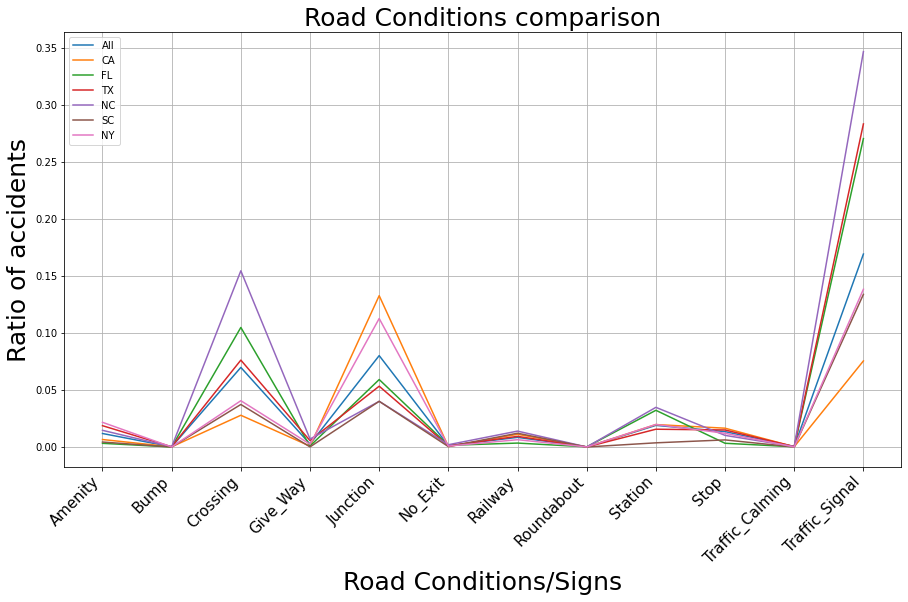

In [0]:
rc_df = pd.DataFrame([rc_all, rc_ca, rc_fl, rc_tx, rc_nc, rc_sc, rc_ny], \
                      index = ['All', 'CA', 'FL', 'TX', 'NC', 'SC', 'NY'], columns=rc_text)
                      
rc_df.T.plot(kind='line', figsize=(15,8))
plt.xlabel("Road Conditions/Signs", fontsize=25)
plt.ylabel("Ratio of accidents", fontsize=25)
plt.title("Road Conditions comparison", fontsize=25);
plt.xticks(range(0,len(rc_text)), rc_df.T.index, rotation=45, ha='right', fontsize=15);
plt.grid(True)

Based on the graph above, we can say that some road signs have a high correlation to the number of accidents while some have zero or low correlation. The road signs are bucketed in the table below based on EDA.

> No/Zero impact | Low/minimal impact | High Impact
> --- | --- | ---
> Bump | Amenity | Crossing
> Give_Way | Railway | Junction
> No_Exit | Stop | Traffic Signal
> Roundabout | Station |
> Traffic_Calming | |


***Note:*** The conditions with zero or low impact can be ingnored from the ML model as their correlation with the number of accidents is quite low.


Further, we notice a pattern that some road signs have a high correlation to accidents in some particular states, while other signs contribute higher to accidents in other states. States and the road signs which contribute to most number of accidents in that particular state are mentioned in the table below.

> **Crossing** | **Junction** | **Station** | **Traffic Signal**
> --- | --- | --- | ----
> NC, FL, TX | CA, NY | FL, NC | NC, TX, FL

### **Conclusion**

Road signs such as Crossing, Junction, and Traffic Signal are the leading road signs causing accidents. This is also in tune with our real-world knowledge. 

We see a high percentage of accidents occuring at the above road spots especially traffic signals. A high density of pedestrians, bikers, cyclists, and other vehicles make that spot prone to accidents.

Also, drivers tend to jump the signals given to impatience especially during night or traffic signals which tend to be lonely/free of traffic. It shall be noted that traffic signals with scarce traffic have relatively high chances of accident since quite a number of times a driver who is under the assumption of no vehicle around is surprised by a speeding vehicle jumping the aignal.

# **Day/Night Effect**

Finally lets check the effect of day & night on accidents in general and across states.

We have four fields in the dataset which informs us about the time of accident - day or night. The fields are as follows.

> **Day/Night features** | Description
> --- | --- |
> Sunrise_Sunset | Sun 0$^{\circ}$ below the horizon.
> Civil_Twilight | Sun 6$^{\circ}$ below the horizon.
> Nautical_Twilight| Sun 12$^{\circ}$ below the horizon.
> Astronomical_Twilight | Sun 18$^{\circ}$ below the horizon.

To start with,we analyze the day/night %age of accidents as per the 4 twilights. The results are shown in the pie charts below.

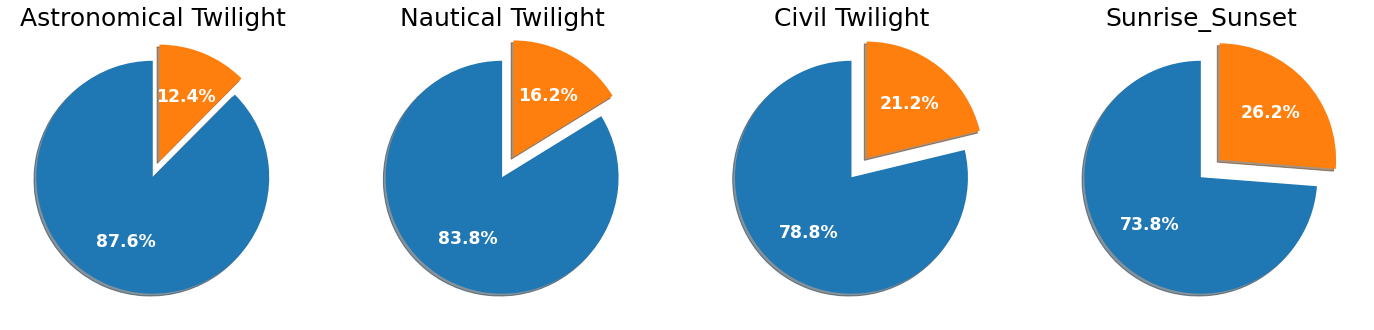

In [0]:
#@title Calculate day/night %age of accident occurance
rise_set = dict(traffic_df['Sunrise_Sunset'].value_counts(sort=False))
civil = dict(traffic_df['Civil_Twilight'].value_counts(sort=False))
naut = dict(traffic_df['Nautical_Twilight'].value_counts(sort=False))
astr = dict(traffic_df['Astronomical_Twilight'].value_counts(sort=False))

fig = plt.figure(figsize=(24,16))

plt.subplot(1, 4, 1)
plt.pie(astr.values(), labels=astr.keys(), explode=(0,0.15), autopct='%1.1f%%', \
        textprops={'size': 'xx-large', 'weight':'bold',\
                   'color':'w'}, shadow=True, startangle=90);
plt.title("Astronomical Twilight", fontsize=25)

plt.subplot(1, 4, 2)
plt.pie(naut.values(), labels=naut.keys(), explode=(0,0.2), autopct='%1.1f%%',\
        textprops={'size': 'xx-large', 'weight':'bold',\
                   'color':'w'}, shadow=True, startangle=90);
plt.title("Nautical Twilight", fontsize=25)

plt.subplot(1, 4, 3)
plt.pie(civil.values(), labels=civil.keys(), explode=(0,0.21), autopct='%1.1f%%', \
        textprops={'size': 'xx-large', 'weight':'bold',\
                   'color':'w'}, shadow=True, startangle=90);
plt.title("Civil Twilight", fontsize=25)

plt.subplot(1, 4, 4)
plt.pie(rise_set.values(), labels=rise_set.keys(), explode=(0,0.22), autopct='%1.1f%%', \
        textprops={'size': 'xx-large', 'weight':'bold',\
                   'color':'w'}, shadow=True, startangle=90);
plt.title("Sunrise_Sunset", fontsize=25)

plt.show()

**Conclusion**

It is observed that almost 75% of the total accidents take place during the day as per all the day night conventions.

Going forward we select the common sunrise_sunset convention to do further analysis for the day/night effect on accidents in different states.

### **Day/Night effect in different states**

Next, let's take a look at the effect of day/night in particular states. 

Text(0.5, 1.0, 'Florida')

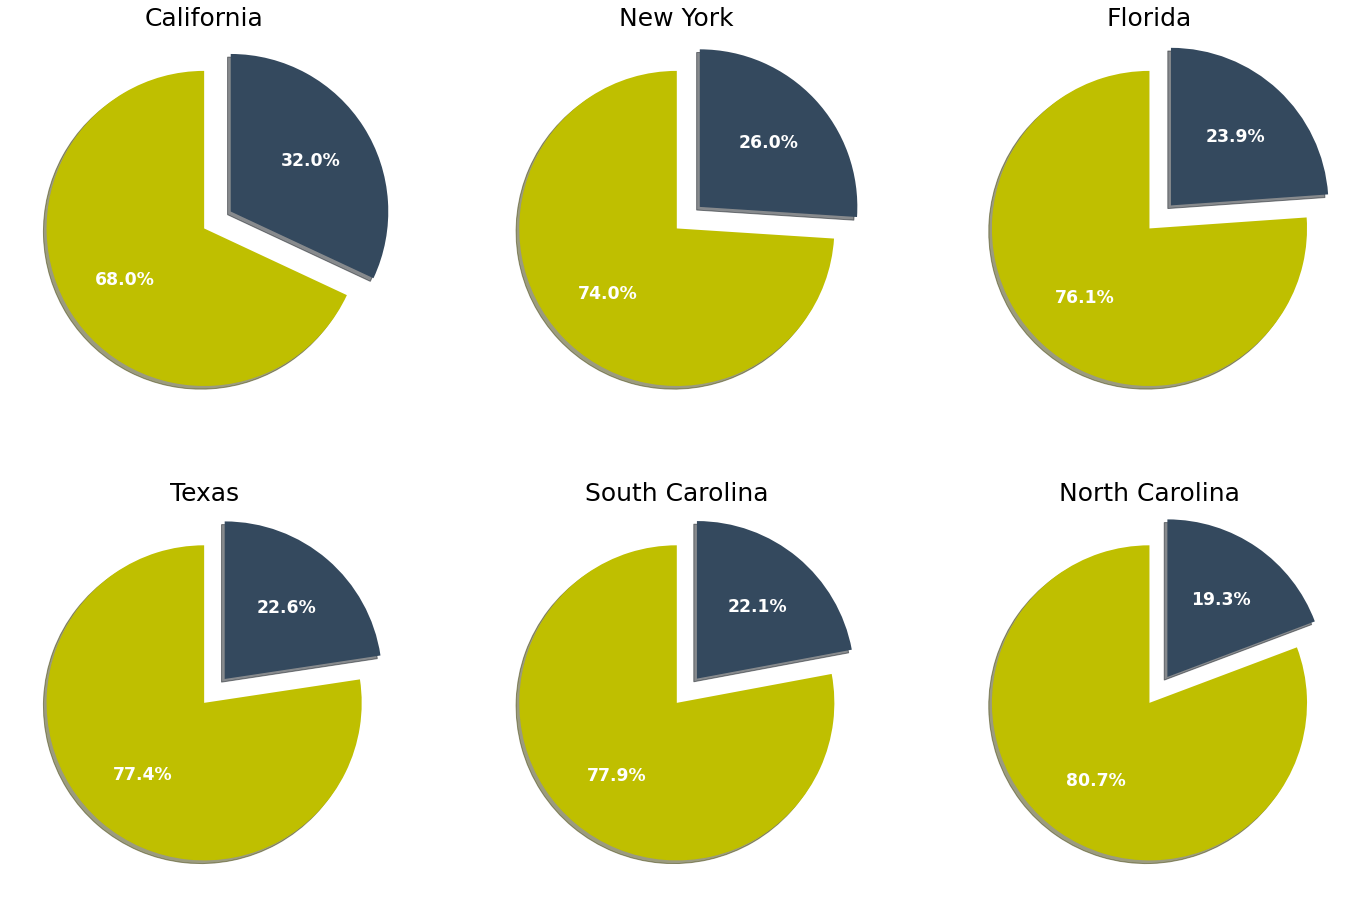

In [0]:
#@title Calculate day/night accident ratio at state level
rise_set_ca = dict(traffic_df[traffic_df['State']=='CA']['Sunrise_Sunset'].value_counts(sort=True))
rise_set_fl = dict(traffic_df[traffic_df['State']=='FL']['Sunrise_Sunset'].value_counts(sort=True))
rise_set_tx = dict(traffic_df[traffic_df['State']=='TX']['Sunrise_Sunset'].value_counts(sort=True))
rise_set_nc = dict(traffic_df[traffic_df['State']=='NC']['Sunrise_Sunset'].value_counts(sort=True))
rise_set_sc = dict(traffic_df[traffic_df['State']=='SC']['Sunrise_Sunset'].value_counts(sort=True))
rise_set_ny = dict(traffic_df[traffic_df['State']=='NY']['Sunrise_Sunset'].value_counts(sort=True))

fig = plt.figure(figsize=(24,16))

plt.subplot(2, 3, 1)
plt.pie(rise_set_ca.values(), labels=rise_set_ca.keys(), explode=(0,0.2), autopct='%1.1f%%',\
        textprops={'size': 'xx-large', 'weight':'bold',\
                   'color':'w'}, colors = ['y', '#34495e'], shadow=True, startangle=90);
plt.title("California", fontsize=25)

plt.subplot(2, 3, 2)
plt.pie(rise_set_ny.values(), labels=rise_set_ny.keys(), explode=(0,0.2), autopct='%1.1f%%',\
        textprops={'size': 'xx-large', 'weight':'bold',\
                   'color':'w'}, colors = ['y', '#34495e'], shadow=True, startangle=90);  
plt.title("New York", fontsize=25);   

plt.subplot(2, 3, 4)
plt.pie(rise_set_tx.values(), labels=rise_set_tx.keys(), explode=(0,0.2), autopct='%1.1f%%',\
        textprops={'size': 'xx-large', 'weight':'bold',\
                   'color':'w'}, colors = ['y', '#34495e'], shadow=True, startangle=90);  
plt.title("Texas", fontsize=25)                                  

plt.subplot(2, 3, 6)
plt.pie(rise_set_nc.values(), labels=rise_set_nc.keys(), explode=(0,0.2), autopct='%1.1f%%',\
        textprops={'size': 'xx-large', 'weight':'bold',\
                   'color':'w'}, colors = ['y', '#34495e'], shadow=True, startangle=90);
plt.title("North Carolina", fontsize=25)

plt.subplot(2, 3, 5)
plt.pie(rise_set_sc.values(), labels=rise_set_sc.keys(), explode=(0,0.2), autopct='%1.1f%%',\
        textprops={'size': 'xx-large', 'weight':'bold',\
                   'color':'w'}, colors = ['y', '#34495e'], shadow=True, startangle=90);  
plt.title("South Carolina", fontsize=25)                                   

plt.subplot(2, 3, 3)
plt.pie(rise_set_fl.values(), labels=rise_set_fl.keys(), explode=(0,0.2), autopct='%1.1f%%',\
        textprops={'size': 'xx-large', 'weight':'bold',\
                   'color':'w'}, colors = ['y', '#34495e'], shadow=True, startangle=90);  
plt.title("Florida", fontsize=25)                                                                  

In the above pie-charts we notice that the ratio of accidents occuring during the day increase in the following order of states.

California << New York << Florida << Texas << South Carolina << North Carolina


Since, states like California, New York, and Florida are cosmopolitan we have considerable traffic after sunset comprising people going back to home after work, people going out for leisure, and some people going to work.

On the other hand, states like North Carolina and South Carolina have relatively less commercial places and different demographics with most people getting back to their homes before sunset witness less accidents on the road after sunset.

Bottomline, around 75% on an average accidents occur during the day than at night.

# **Severity**

Severity is a categorical feature describing how bad the accident had been. This feature can take one of the four values - 1, 2, 3, 4 where 1 being least impact on traffic
and 4 being significant impact on traffic. 

The severity here is measured by the disruption caused in traffic due to the accident.

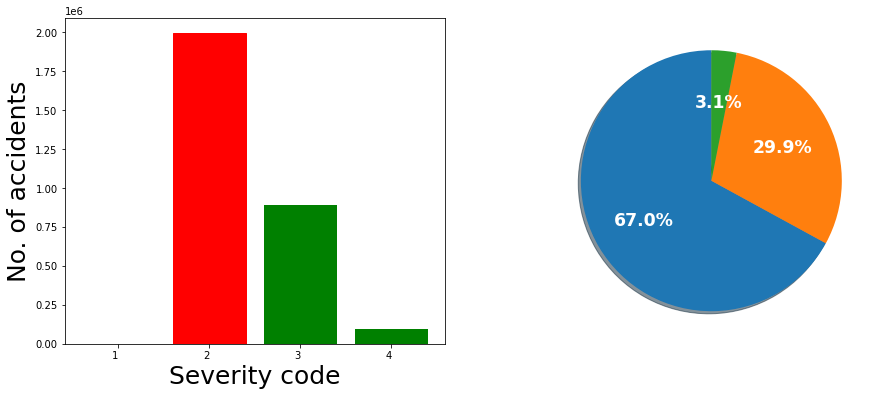

In [0]:
#@title Accident proportion based on severity
d_sev = dict(traffic_df['Severity'].astype('category').value_counts(sort=False))

plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
bar_sev = plt.bar(x = d_sev.keys(), height = d_sev.values(), color = 'g')
bar_sev[1].set_color('r')
plt.xlabel("Severity code", fontsize=25)
plt.ylabel("No. of accidents", fontsize=25)
plt.xticks([1,2,3,4],  ha="right");

plt.subplot(1,2,2)
d_sev.pop(1)
plt.pie(d_sev.values(), labels=d_sev.keys(), autopct='%1.1f%%', 
        textprops={'size': 'xx-large', 'weight':'bold',\
                   'color':'w'},
        shadow=True, startangle=90);

It is observed that a majority of the accidents are of severity 2.

Form the pie-chart on the right, we infer that 67% of the accidents are of severity 2, while almost 30% of the accidents being of severity 3. Finally, 3% of all the accidents are highly severe and fall in category 4.

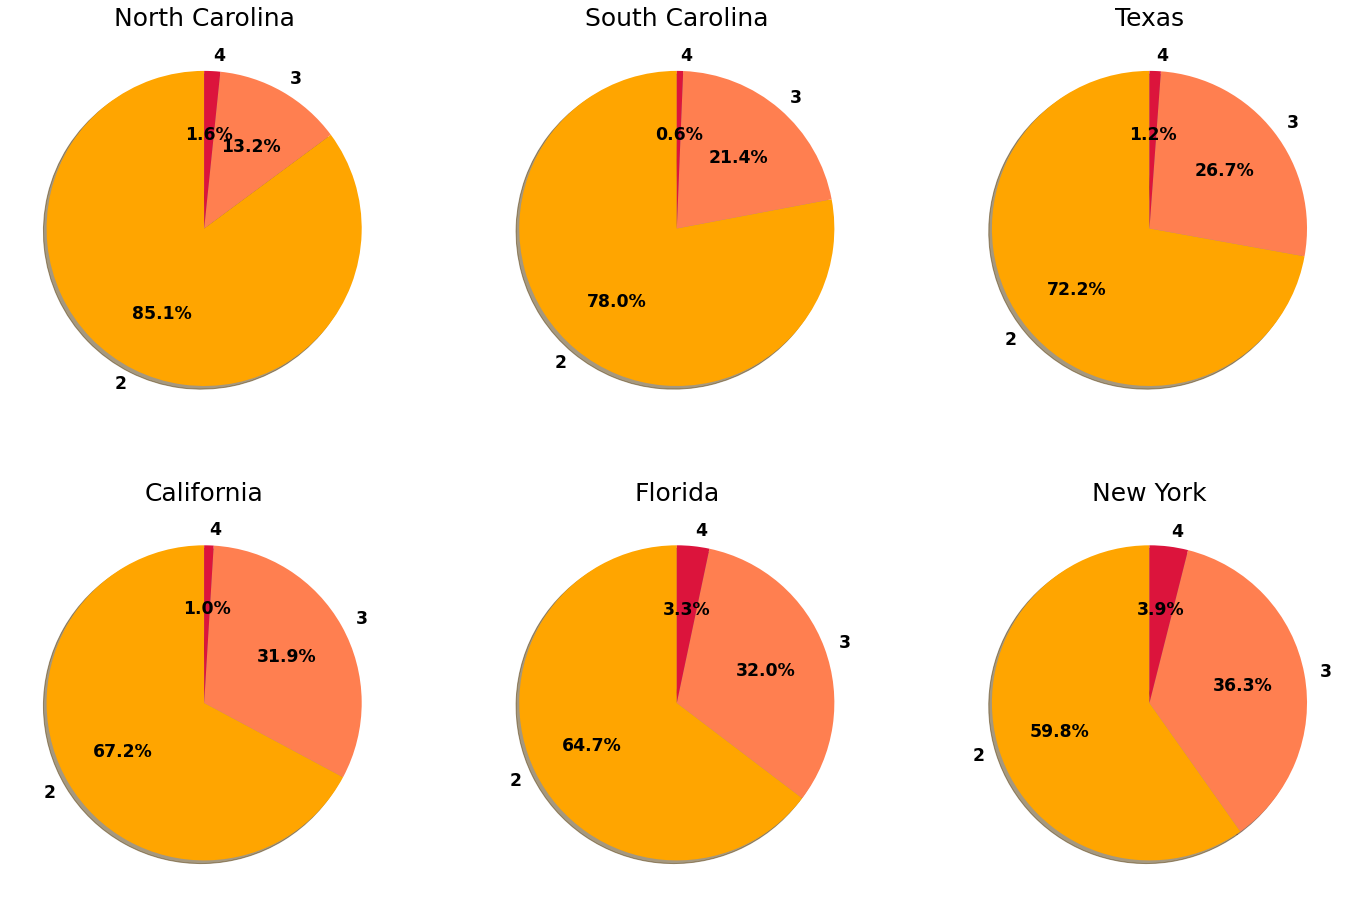

In [0]:
#@title **Severity code spread at state-level**
d_sev_ca = dict(traffic_df[traffic_df.State == 'CA']['Severity'].astype('category').value_counts(sort=False))
d_sev_tx = dict(traffic_df[traffic_df.State == 'TX']['Severity'].astype('category').value_counts(sort=False))
d_sev_fl = dict(traffic_df[traffic_df.State == 'FL']['Severity'].astype('category').value_counts(sort=False))
d_sev_sc = dict(traffic_df[traffic_df.State == 'SC']['Severity'].astype('category').value_counts(sort=False))
d_sev_nc = dict(traffic_df[traffic_df.State == 'NC']['Severity'].astype('category').value_counts(sort=False))
d_sev_ny = dict(traffic_df[traffic_df.State == 'NY']['Severity'].astype('category').value_counts(sort=False))

d_sev_ca.pop(1)
d_sev_tx.pop(1)
d_sev_fl.pop(1)
d_sev_sc.pop(1)
d_sev_nc.pop(1)
d_sev_ny.pop(1)

fig = plt.figure(figsize=(24,16))

plt.subplot(2, 3, 4)
plt.pie(d_sev_ca.values(), labels=d_sev_ca.keys(),  autopct='%1.1f%%',\
        textprops={'size': 'xx-large', 'weight':'bold',\
                   'color':'black'}, colors = ['orange', 'coral', 'crimson'], shadow=True, startangle=90);
plt.title("California", fontsize=25)

plt.subplot(2, 3, 6)
plt.pie(d_sev_ny.values(), labels=d_sev_ny.keys(),  autopct='%1.1f%%',\
        textprops={'size': 'xx-large', 'weight':'bold',\
                   'color':'black'}, colors = ['orange', 'coral', 'crimson'], shadow=True, startangle=90);  
plt.title("New York", fontsize=25);   

plt.subplot(2, 3, 3)
plt.pie(d_sev_tx.values(), labels=d_sev_tx.keys(),  autopct='%1.1f%%',\
        textprops={'size': 'xx-large', 'weight':'bold',\
                   'color':'black'}, colors = ['orange', 'coral', 'crimson'], shadow=True, startangle=90);  
plt.title("Texas", fontsize=25)                                  

plt.subplot(2, 3, 1)
plt.pie(d_sev_nc.values(), labels=d_sev_nc.keys(),  autopct='%1.1f%%',\
        textprops={'size': 'xx-large', 'weight':'bold',\
                   'color':'black'}, colors = ['orange', 'coral', 'crimson'], shadow=True, startangle=90);
plt.title("North Carolina", fontsize=25)

plt.subplot(2, 3, 2)
plt.pie(d_sev_sc.values(), labels=d_sev_sc.keys(),  autopct='%1.1f%%',\
        textprops={'size': 'xx-large', 'weight':'bold',\
                   'color':'black'}, colors = ['orange', 'coral', 'crimson'], shadow=True, startangle=90);  
plt.title("South Carolina", fontsize=25)                                   

plt.subplot(2, 3, 5)
plt.pie(d_sev_fl.values(), labels=d_sev_fl.keys(),  autopct='%1.1f%%',\
        textprops={'size': 'xx-large', 'weight':'bold',\
                   'color':'black'}, colors = ['orange', 'coral', 'crimson'], shadow=True, startangle=90);  
plt.title("Florida", fontsize=25);                                   

From the above diagrams, we infer a couple of observations.

- Accidents of high severity occurred more in NY and FL
- NC, SC, and TX mostly have accidents of severity 2 and 3

**Conclusion**

Majority of the accidents which occur are of severity 2 followed by 3 and 4 in most of the states. Some of the states have more number of high severity accidents than the rest.

With this we conclude our EDA and move towards building machine learning models to predict the severity of the accidents.

![alt text](https://lukeoakdenrayner.files.wordpress.com/2017/12/cars-3-crash.gif?w=500&h=208&crop=1)

# **Data Modelling**

After performing an extensive EDA, we now have a fair idea of what fields affect the accidebt rate. We saw that road conditions such as traffic signal highly prone sites of accidents. Further, we came to know that in several states most of the accidents happen on a day when the weather is not clear. Clouds, rain, snow, thunderstorms all these conditions make roads unsafe and the increase the chance of accidents.

In the next two sections, we build machine learning classifiers to predict the severity of an accident. Accident severity is an important measure to evaluate the safety of a region. Prediciting severity score in real-time will help in providing the necessary medical and safety assistance on the spot. Lastly, this severity score is extremely helpful in managing the traffic around the affected area. Therefore, predicting the severity score of an accident in real-time will help in faster and efficient response.

To do this, first we predict the measure of severity based on the text description of the accident. The results of this prediction task revealed that the description text is mostly templatic and does not vary much based on the severity of the accident.

Therefore, we tried to build a better classifier by including rest of the fields of the dataset. Fields corresponding to weather, road conditions, location and time of the day comprised of the input features. This classifier finally was trained on a massive dataset with almost 2.5 million data samples and 67 columns. Processing techniques such as one-hot encoding, data imputation, and field/type conversion were employed along with dimensionality reduction using PCA. Finally to help with the computations, we used the Spark framework to run and host the model.

We saw an improvement in the F1 score after including more features in the classifier.

## **Predict severity based on Description of the accident**

In this section, we will extract information from the **Description** feature/columns. As per the official documentation of the dataset, the **Description** feature shows natural language description of the accident. Feature values for some of the samples are as follows.

> Description |
> --- |
> 'Accident on OH-16 Broad St at Yearling Rd. Expect delays.' |
> '#3 lane blocked due to accident on I-580 Eastbound after I-580 Exit 48 / El Charro Rd.'|
> 'Accident on US-101 Southbound at Exit 414B CA-92. On the median.'|
> 'Slow lane blocked due to accident on CA-57 Southbound at Exit 14 Brea Canyon Cut Off Rd.' |

Using NLP techniques, we built a classifier to predict the severity of the accident based on the text description of the accident.

We built a ***tf-idf*** representation of each description and built two classifiers using **Naive Bayes** and **Random Forest** algorithms.

The Naive Bayes algorithm performed much better with an F1 score of 0.59.

In [0]:
#@title **Utility function to print confusion matrix**
from textwrap import wrap
import re
import itertools
import matplotlib
import numpy as np
from sklearn.metrics import confusion_matrix


# Credits - https://stackoverflow.com/questions/41617463/tensorflow-confusion-matrix-in-tensorboard
def plot_confusion_matrix(correct_labels, predict_labels, labels, display_labels, title='Confusion matrix', tensor_name = 'MyFigure/image', normalize=False):
  ''' 
  Parameters:
      correct_labels                  : These are your true classification categories.
      predict_labels                  : These are you predicted classification categories
      labels                          : This is a lit of labels which will be used to display the axix labels
      title='Confusion matrix'        : Title for your matrix
      tensor_name = 'MyFigure/image'  : Name for the output summay tensor

  Returns:
      summary: TensorFlow summary 

  Other itema to note:
      - Depending on the number of category and the data , you may have to modify the figzie, font sizes etc. 
      - Currently, some of the ticks dont line up due to rotations.
  '''
  cm = confusion_matrix(correct_labels, predict_labels, labels=labels)
  if normalize:
      cm = cm.astype('float')*10 / cm.sum(axis=1)[:, np.newaxis]
      cm = np.nan_to_num(cm, copy=True)
      cm = cm.astype('int')

  np.set_printoptions(precision=2)
  ###fig, ax = matplotlib.figure.Figure()

  fig = matplotlib.pyplot.figure(figsize=(2, 2), dpi=320, facecolor='w', edgecolor='k')
  ax = fig.add_subplot(1, 1, 1)
  im = ax.imshow(cm, cmap='Oranges')

  classes = [re.sub(r'([a-z](?=[A-Z])|[A-Z](?=[A-Z][a-z]))', r'\1 ', x) for x in display_labels]
  classes = ['\n'.join(wrap(l, 40)) for l in classes]

  tick_marks = np.arange(len(classes))

  ax.set_xlabel('Predicted', fontsize=7)
  ax.set_xticks(tick_marks)
  c = ax.set_xticklabels(classes, fontsize=4, rotation=-90,  ha='center')
  ax.xaxis.set_label_position('bottom')
  ax.xaxis.tick_bottom()

  ax.set_ylabel('True Label', fontsize=7)
  ax.set_yticks(tick_marks)
  ax.set_yticklabels(classes, fontsize=4, va ='center')
  ax.yaxis.set_label_position('left')
  ax.yaxis.tick_left()

  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      ax.text(j, i, format(cm[i, j], 'd') if cm[i,j]!=0 else '.', horizontalalignment="center", fontsize=6, verticalalignment='center', color= "black")
  fig.set_tight_layout(True)
  matplotlib.pyplot.show()

  return

In [0]:
#Creating a new dataframe to build Description field classifier
desc_df = traffic_df[['Description', 'Severity']].copy()
desc_df = desc_df.dropna()

In [0]:
#Build tf-idf reperesentation matrix for each sample description/document
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(desc_df['Description'])

#Split the dataset into train-test split
X_train, X_test, y_train, y_test = train_test_split(X, desc_df['Severity'].astype('category'), test_size=0.3, random_state=42)

### **Naive Bayes Classifier**

In [0]:
NB_clf = MultinomialNB()
NB_clf.fit(X_train, y_train)

y_pred_nb = NB_clf.predict(X_test)

In [0]:
print("Naive Bayes: ",f1_score(y_test, y_pred_nb, average='weighted'))
print("Naive Bayes: ",f1_score(y_test, y_pred_nb, average='micro'))
print("Naive Bayes: ",f1_score(y_test, y_pred_nb, average='macro'))

Naive Bayes:  0.8368960759954548
Naive Bayes:  0.8391585350683234
Naive Bayes:  0.5989214495517241


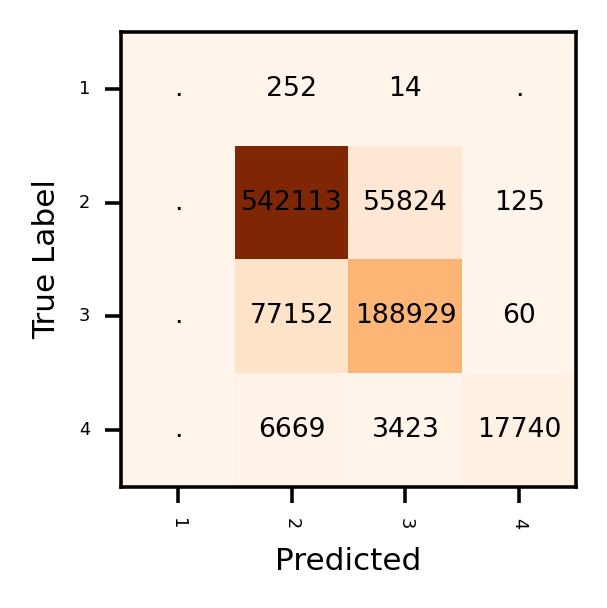

In [0]:
plot_confusion_matrix(y_test, y_pred_nb, labels=[1,2,3,4], display_labels=['1','2','3','4'], title='Confusion matrix - NaiveBayes', tensor_name = 'MyFigure/image', normalize=False)

### **Random Forest**

Next, we built a Random Forest Classifier to predict the severity score based on text description of the accident.

In [0]:
RF_clf = RandomForestClassifier(max_depth=2, random_state=0)
RF_clf.fit(X_train, y_train)

y_pred_rf = RF_clf.predict(X_test)

In [0]:
print("Naive Bayes: ",f1_score(y_test, y_pred_rf, average='weighted'))
print("Naive Bayes: ",f1_score(y_test, y_pred_rf, average='micro'))
print("Naive Bayes: ",f1_score(y_test, y_pred_rf, average='macro'))

Naive Bayes:  0.5379215875657588
Naive Bayes:  0.6702469234036497
Naive Bayes:  0.20064306481038513


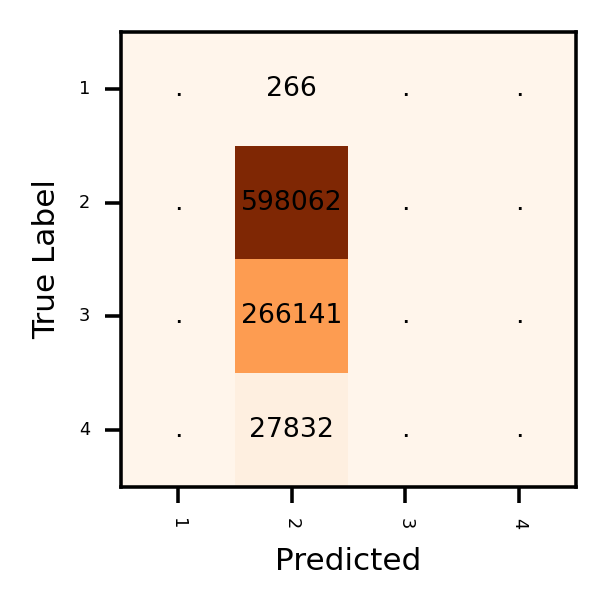

In [0]:
plot_confusion_matrix(y_test, y_pred_rf, labels=[1,2,3,4], display_labels=['1','2','3','4'], title='Confusion matrix - Random Forest', tensor_name = 'MyFigure/image', normalize=False)

Clearly, Naive Bayes classifier is a better classifier out of the two. The F1 scores and the true positives across classes are considerably high for Naive Bayes than Random Forest.

## **Predicting Severity based on features corresponding to weather, road condition, time of day, and location**

In the last section, we build a classifier based on the features shortlisted from the above performed EDA. The list of the features from different groups is as follows.

> Accident Info.| Geographical location | Weather | Road signs | Day/Night
>--- | --- | --- | --- | --- 
> Difference between start and end time | State | Temperature(F) | Crossing | Sunrise_Sunset
> Distance(mi) | | Wind_Chill(F) | Junction
> | | Pressure(in) | Traffic Signal |
> | | Visibility(mi)     ||
> | | Wind_Speed(mph)    ||
> | | Precipitation(in)  ||
> | | Weather_Condition  ||

## **Data Pre-processing**

Some of the above features require special handling and further processing e.g. all the categorical fields such as Sunrise_Sunset and State were converted into one-hot encoded vectors.

The field Weather_Condition contains 121 unique entries. Similar entries can be clubbed into one. The similarity between two weather conditions was decided based on real-world knowledge. For example, cloudy, mostly cloudy, partially cloudy, and overcast can be treated as one value 'cloudy' for simplicity purposes. 

All the continuous value fields having missing values were imputed using the 'mean' strategy. 

Lastly, we used PCA to reduce the dimension of the feature matrix. After performing PCA it was found that 57 features explained 95% variance of the data. Therefore, using PCA we reduced the dimensions of the feature matrix from 65 to 57.

Lastly, we calcuated F1_score, precision, and recall to evaluate our results.

In [0]:
drop_columns_model = ['TMC', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', \
                      'Number', 'Street', 'Side', 'City', 'County', 'Zipcode', 'Timezone',\
                      'Airport_Code', 'Weather_Timestamp', 'Amenity', 'Roundabout',\
                      'Bump', 'Give_Way', 'No_Exit', 'Railway', 'Roundabout', 'Station',\
                      'Stop', 'Traffic_Calming', 'Civil_Twilight', 'Wind_Direction',\
                      'Nautical_Twilight', 'Astronomical_Twilight', 'Description']                      

### **Feature Engineering**

**Duration**

Duration of the accident. Calculated by taking the difference of the start and end time columns

In [0]:
# Drop extra columns
final_df = traffic_df.drop(drop_columns_model, axis='columns')
#Create new features
final_df['Duration'] = pd.to_datetime(final_df['End_Time']) - pd.to_datetime(final_df['Start_Time'])
final_df['Duration'] = final_df['Duration'].apply(lambda x:x.total_seconds()/60)
final_df.drop(['Start_Time', 'End_Time'], axis='columns', inplace=True)

**Weather_Condition**

For the field **Weather_Condition**, we classified the values into 4 categories 0,1,2,3 where 0 denotes clear or safe to drive weather and 3 denotes harsh weather or weather unsafe/unfit for driving.

Each of the unique 121 values were mapped to one of the above categories based on real-world knowledge of weather conditions and human intuition.

In [0]:
weather_condition_dict = {'clear':0, 'fair':0,
                          'light':1, 'drizzle': 1, 'cloudy':1, 'overcast':1, 'thunder':1,
                          'vicinity':1, 'haze':1, 'mist':1, 'smoke':1, 'volcanic ash':1,
                          'blowing sand':1, 'widespread dust':1, 'sand':1, 'small hail':1,
                          'n/a precipitation':1, 'blowing dust':2,
                          'hail':2, 'thunderstorm':2, 'funnel cloud':2, 'ice pellets':2,
                          'rain':2, 'snow':2, 'fog':2, 'smoke':2, 't-storm':2,
                          'heavy':3, 'windy':3, 'whirl':3, 'tornado':3, 'sleet':3,
                          'squalls':3, 'wintry mix':3}

imp_weather = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='clear')
final_df['Weather_Condition'] = imp_weather.fit_transform(final_df[['Weather_Condition']])

final_df['Weather_Condition'] = final_df['Weather_Condition'].apply(lambda x:x.lower())
final_df['Weather_Condition'] = final_df['Weather_Condition'].apply(lambda x: 'light' if (x.find('light') != -1) else x)
final_df['Weather_Condition'] = final_df['Weather_Condition'].apply(lambda x: 'heavy' if (x.find('heavy') != -1) else x)
final_df['Weather_Condition'] = final_df['Weather_Condition'].apply(lambda x: 'cloudy' if (x.find('cloudy') != -1) else x)
final_df['Weather_Condition'] = final_df['Weather_Condition'].apply(lambda x: 'cloudy' if (x.find('scattered clouds') != -1) else x)
final_df['Weather_Condition'] = final_df['Weather_Condition'].apply(lambda x: 'windy' if (x.find('/ windy') != -1) else x)
final_df['Weather_Condition'] = final_df['Weather_Condition'].apply(lambda x: 'vicinity' if (x.find('vicinity') != -1) else x)
final_df['Weather_Condition'] = final_df['Weather_Condition'].apply(lambda x: 'rain' if (x.find('rain') != -1) else x)
final_df['Weather_Condition'] = final_df['Weather_Condition'].apply(lambda x: 'snow' if (x.find('snow') != -1) else x)
final_df['Weather_Condition'] = final_df['Weather_Condition'].apply(lambda x: 'fog' if (x.find('fog') != -1) else x)
final_df['Weather_Condition'] = final_df['Weather_Condition'].apply(lambda x: 'whirl' if (x.find('whirl') != -1) else x)
# Map weather conditions to category - 0,1,2,3
final_df['Weather_Condition'] = final_df['Weather_Condition'].apply(lambda x: weather_condition_dict[x])

In [0]:
# Convert fields to Categorical
final_df.State = final_df.State.astype('category')
final_df.Sunrise_Sunset = final_df.Sunrise_Sunset.astype('category')
final_df.Severity = final_df.Severity.astype('category')

### **Categorical columns to one-hot encoded vectors**

In [0]:
final_df = pd.get_dummies(final_df, columns = ['State', 'Sunrise_Sunset'])

### **Impute missing values**

In [0]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
final_df[['Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)',\
          'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)']] \
          = imp.fit_transform(final_df[['Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)',\
          'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)'\
          ]])

In [0]:
# Check for NaN values
final_copy = final_df.copy()
print(final_copy.shape)
final_copy.dropna(inplace=True)
print(final_copy.shape)

(2974335, 65)
(2974335, 65)


In [0]:
# Some pre-processing for spark dataframe
final_df.rename(columns = {'Severity':'label'}, inplace = True)
final_df.to_csv('final_df_all.csv')
col_features = final_df.columns.tolist()

In [0]:
# Assigning Features and Labels
label = final_df['label']
features = final_df[col_features]

### **Train-test split**

In [0]:
# Split dataset into train and test set
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=42)

### **PCA**

In [0]:
#Standardize data for PCA
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

In [0]:
#Perform PCA
model_pca = PCA(n_components=65, random_state=42)
model_pca.fit(x_train)

PCA(copy=True, iterated_power='auto', n_components=65, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)

In [0]:
sum = 0
for i, ratio in enumerate(model_pca.explained_variance_ratio_):
  sum += ratio
  if sum >= 0.945:
    print(i+1, sum)
    break

57 0.9536826704114518


In [0]:
model_pca = PCA(n_components=57, random_state=42)
x_train = model_pca.fit_transform(x_train)

# **Building model**
### **Random Forest classifier**

### **Hyper-parameter tuning**

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
# Your code goes here
parameters = {'n_estimators':[500, 1000], 'max_depth':[4,5,6] }
rf_reg = RandomForestClassifier()
grid_cv = GridSearchCV(rf_reg, parameters, scoring='f1_macro', verbose=2)
grid_cv.fit(x_train[0:2000], y_train[0:2000])

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] max_depth=4, n_estimators=500 ...................................


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................... max_depth=4, n_estimators=500, total=   2.2s
[CV] max_depth=4, n_estimators=500 ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s remaining:    0.0s


[CV] .................... max_depth=4, n_estimators=500, total=   2.2s
[CV] max_depth=4, n_estimators=500 ...................................
[CV] .................... max_depth=4, n_estimators=500, total=   2.1s
[CV] max_depth=4, n_estimators=500 ...................................
[CV] .................... max_depth=4, n_estimators=500, total=   2.1s
[CV] max_depth=4, n_estimators=500 ...................................
[CV] .................... max_depth=4, n_estimators=500, total=   2.1s
[CV] max_depth=4, n_estimators=1000 ..................................
[CV] ................... max_depth=4, n_estimators=1000, total=   4.3s
[CV] max_depth=4, n_estimators=1000 ..................................
[CV] ................... max_depth=4, n_estimators=1000, total=   4.3s
[CV] max_depth=4, n_estimators=1000 ..................................
[CV] ................... max_depth=4, n_estimators=1000, total=   4.3s
[CV] max_depth=4, n_estimators=1000 ..................................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  1.8min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [0]:
grid_cv.best_params_

{'max_depth': 6, 'n_estimators': 500}

In [0]:
x_test = scaler.fit_transform(x_test)
x_test = model_pca.transform(x_test)

### **Model Training**

In [0]:
rf_clf = RandomForestClassifier(n_estimators=20, max_depth=6, random_state=42, verbose=2)
rf_clf.fit(x_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 20


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   18.8s remaining:    0.0s


building tree 2 of 20
building tree 3 of 20
building tree 4 of 20
building tree 5 of 20
building tree 6 of 20
building tree 7 of 20
building tree 8 of 20
building tree 9 of 20
building tree 10 of 20
building tree 11 of 20
building tree 12 of 20
building tree 13 of 20
building tree 14 of 20
building tree 15 of 20
building tree 16 of 20
building tree 17 of 20
building tree 18 of 20
building tree 19 of 20
building tree 20 of 20


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  6.4min finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=42, verbose=2,
                       warm_start=False)

### **Predicting test labels**

In [0]:
y_pred = rf_clf.predict(x_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    1.1s finished


In [0]:
print("Random Forest: ", f1_score(y_test, y_pred, average='weighted'))
print("Random Forest: ", f1_score(y_test, y_pred, average='micro'))
print("Random Forest: ", f1_score(y_test, y_pred, average='macro'))

Random Forest:  0.8710153477917798
Random Forest:  0.888443971509598
Random Forest:  0.4371337510080741


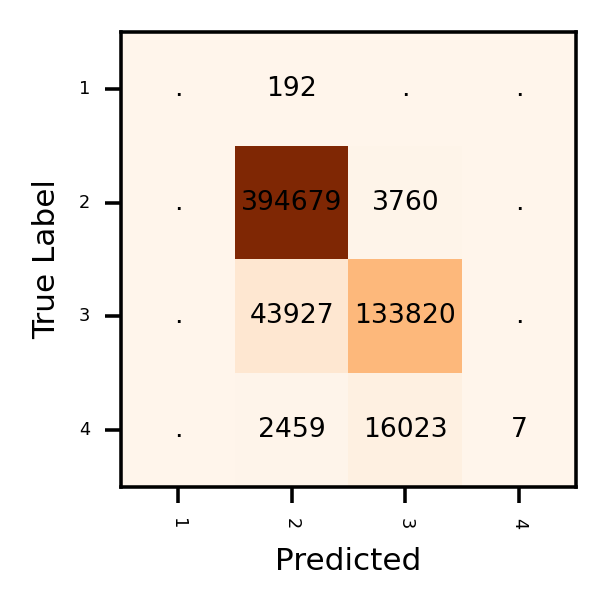

In [0]:
plot_confusion_matrix(y_test, y_pred, labels=[1,2,3,4], display_labels=['1','2','3','4'], title='Confusion matrix - NaiveBayes', tensor_name = 'MyFigure/image', normalize=False)

After increasing the number of features in the classifier we see an increase in the F1 score. Below is a comparison between the F1 scores obtained from classifier trained on Description field in the previous part and the classifier trained on all the relevant fields.

> F1 score| Description classifier (NB) | All features (RF)
> --- | --- | ---
> weighted | 0.83 | 0.87
> micro | 0.84 | 0.88
> macro | 0.6 | 0.43

where NB - Naive Bayes and RF - Random Forest 

# **Training model on Spark**

Given the large number of samples in the dataset, the random forest classifier took a huge amount of time and could only manage to train for 20 estimators (tress in a forest). With such low number of estimators we have not been able to leverage the complete power of the Random Forest algorithm.

Therefore, we train the classifier on Spark framework to speed up the training with large number of trees. 

### **Setting up spark**

In [0]:
! sudo apt install openjdk-8-jdk
! sudo update-alternatives --config java

In [0]:
#@title Install Spark
!apt install libkrb5-dev
!wget https://www-us.apache.org/dist/spark/spark-2.4.5/spark-2.4.5-bin-hadoop2.7.tgz
!tar xf spark-2.4.5-bin-hadoop2.7.tgz
!pip install findspark
!pip install sparkmagic
!pip install pyspark
!pip install pyspark --user
!pip install seaborn --user
!pip install plotly --user
!pip install imageio --user
!pip install folium --user

In [0]:
!apt update
!apt install gcc python-dev libkrb5-dev

### **Create Spark session**

In [0]:
from pyspark.sql import SparkSession
from pyspark.sql.types import *
import pyspark.sql.functions as F

import os

spark = SparkSession.builder.appName('ml-project').getOrCreate()

In [0]:
%load_ext sparkmagic.magics

The sparkmagic.magics extension is already loaded. To reload it, use:
  %reload_ext sparkmagic.magics


In [0]:
#graph section
import networkx as nx
# SQLite RDBMS
import sqlite3
# Parallel processing
# import swifter
import pandas as pd
# NoSQL DB
from pymongo import MongoClient
from pymongo.errors import DuplicateKeyError, OperationFailure

import os
os.environ['SPARK_HOME'] = '/content/spark-2.4.5-bin-hadoop2.7'
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
import pyspark
from pyspark.sql import SQLContext

In [0]:
try:
    if(spark == None):
        spark = SparkSession.builder.appName('Initial').getOrCreate()
        sqlContext=SQLContext(spark)
except NameError:
    spark = SparkSession.builder.appName('Initial').getOrCreate()
    sqlContext=SQLContext(spark)


In [0]:
train_sdf = spark.read.format('csv').options(header='true', inferSchema='true').load('/content/drive/My Drive/CIS545_project/final_df.csv')

In [0]:
train_sdf.show(5)

+---+-----+------------+--------------+-----------------+-----------+------------+--------------+-----------------+--------------------+--------+--------+--------------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+------------------+--------------------+
|_c0|label|Distance(mi)|Temperature(F)|    Wind_Chill(F)|Humidity(%)|Pressure(in)|Visibility(mi)|  Wind_Speed(mph)|   Precipitation(in)|Crossing|Junction|Traffic_Signal|Duration|State_AL|State_AR|State_AZ|State_CA|State_CO|State_CT|State_DC|State_DE|State_FL|State_GA|State_IA|State_ID|State_IL|State_IN|State_KS|State_KY|State_LA|State_MA|

In [0]:
train_sdf.printSchema()

In [0]:
train_sdf = spark.read.format('csv').options(header='true', inferSchema='true').load('/content/final_df_all.csv')

In [0]:
from pyspark.ml.feature import StringIndexer, VectorAssembler
assembler = VectorAssembler(inputCols=col_features, outputCol="features")

In [0]:
from pyspark.ml import Pipeline
pipeline = Pipeline(stages=[assembler])
model = pipeline.fit(train_sdf)
modified_data_sdf = model.transform(train_sdf)

In [0]:
train_sdf, test_sdf = modified_data_sdf.randomSplit([0.8, 0.2], seed = 2018)

### **Spark PCA**

In [0]:
from pyspark.ml.feature import PCA

pca = PCA(k=57, inputCol="features", outputCol="pcaFeatures")
pca_model = pca.fit(train_sdf)
pca_sdf = pca_model.transform(train_sdf)

test_pca_sdf = pca_model.transform(test_sdf)

### **Instantiate model - RandomForestClassifier**

In [0]:
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.feature import IndexToString, StringIndexer, VectorIndexer
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

labelIndexer = StringIndexer(inputCol="label", outputCol="indexedLabel").fit(pca_sdf)
featureIndexer =VectorIndexer(inputCol="features", outputCol="indexedFeatures", maxCategories=4).fit(pca_sdf)
rf = RandomForestClassifier(labelCol="indexedLabel", featuresCol="indexedFeatures", numTrees=100)
labelConverter = IndexToString(inputCol="prediction", outputCol="predictedLabel",
                               labels=labelIndexer.labels)

### **Training model and predictions**

In [0]:
pipeline = Pipeline(stages=[labelIndexer, featureIndexer, rf, labelConverter])
model = pipeline.fit(pca_sdf)
predictions = model.transform(test_pca_sdf)

### **Model Evaluation**

In [0]:
evaluator = MulticlassClassificationEvaluator(
    labelCol="indexedLabel", predictionCol="prediction", metricName="f1")
f1 = evaluator.evaluate(predictions)
print("F1 score (Random Forest): ", f1)

F1 score (Random Forest):  0.9503698197933143


An F1 score of 0.95 calls for something like this.

![FnFcrash](https://hips.hearstapps.com/roa.h-cdn.co/assets/15/15/1428341268-furiousloop.gif)

*PS: Please don't try this at home or otherwise until you are Vin Diesel.*


# **Conclusion and Future Work**

In this project, we explored the US traffic accidents dataset to find the factors affecting accidents on US roads. The features were broadly from one of the following categories - geographical location of the dataset, weather conditions, time of day, and road conditions. 

We started by performing EDA. At first, we identified the states with the highest number of accidents. It was found that states - CA, FL, TX, NC, SC, and NY account for 55% of the total number of accidents in the United States.

Then we focused on identifying the reason of the high rate of accidents in these six states by performing a state wise comparison of the weather conditions, time of the day, road conditions etc.. 

Some of the findings of the above  visual analysis were that every state has a different reason for the occurance of accidents. 
In Texas we saw that more than 50% of accidents take place on a cloudy day. While in California, more than 50% accidents occur on a clear day. In New York and California the number of accidents during the night are higher as compared to other states.

Through this analysis we were able to identify the relevant features which had a high impact on the occurance of an accident. Using these selected features, we built a severity score predictor classifier with an F1 score of 0.95. 

The severity score helps the authorities in planning and delivering response to an accident in a fast and efficient way. Further, it helps in identifying high severity zones so that measures can be taken to make them safer for driving.

### **Future Work**
In this work, we did not have information regarding drunk driving or cell phone use at the time of accident. Both of these factors are leading causes for road accidents in present times. Future work can be directed in figuring out ways to collect data related to drunk driving and cell phone use. Analysis on these factors will unravel further patterns in traffic accidents and will help in making the roads safer.

Data regarding number of vehicles and licensed driver per state can be sourced from other external sources and can be incorporated in this analsysis. Such information will help in improing the qualitative aspect of decisions e.g. maybe the high number of accidents in California as compared to other states is because of the high number of vehicles on California roads as compared to total vehicles in other states.